In [62]:



import numpy as np
import sys, re, fileinput, argparse

In [63]:
import pandas as pd 

In [64]:
df1 = pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-0-2.csv')
df2= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-2-4.csv')
df3= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-4-6.csv')
df4= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-6-8.csv')
df5= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-8-10.csv')
df6= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-10-12.csv')



df=pd.DataFrame()
df=df.append(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)
df=df.append(df6)
df=df.reset_index()


In [65]:
len(df)
df

,index,publish_date,title,url,summary,source_url,meta_tags,content,category,subcategory,thumbnail
0,0,"October 20th 2019, 12:39:00.000",کشف انبار مهمات طالبان در یک مسجد ولایت قندهار,shabestan.ir,منسوبین اردوی ملی افغانستان انبار سلاح و مهمات...,shabestan.ir,"[""انبار مهمات"",""افغانستان"",""طالبان"",""مسجد""]","<strong><span dir=""RTL"">به گزارش&nbsp;<a href=...",NaN,NaN,http://media.shabestan.ir/Original/1398/08/18/...
1,1,"October 20th 2019, 11:45:00.000",دستان خالی آموزش و پرورش در اجرای وظایف/ «کاهش...,yjc.ir,NaN,yjc.ir,"[""آموزش و پرورش"",""اخبار دانش‌آموزی"",""اخبار مدا...",<p>کاهش تنوع مدارس، شعار سال‌های اخیر سکاندارا...,NaN,NaN,https://cdn.yjc.ir/files/fa/news/1398/7/27/107...
2,2,"October 20th 2019, 14:05:00.000",ورمزیار: بازیکنان استقلال باید بدانند پیراهن چ...,tasnimnews.com,صادق ورمزیار، پیشکسوت باشگاه استقلال اعتقاد دا...,tasnimnews.com,"[""فوتبال"",""آندره‌آ استراماچونی"",""استقلال"",""فوت...","<div class=""hideTag"">\n <a href=""/fa/service/3...",NaN,NaN,https://newsmedia.tasnimnews.com/Tasnim/Upload...
3,3,"October 20th 2019, 09:48:00.000",هیاتی از کنگره آمریکا با پادشاه اردن درباره سو...,irna.ir,تهران- ایرنا- هیاتی دو حزبی از کنگره آمریکا به...,irna.ir,"[""کنگره آمریکا""]","<div class=""item-text"" itemprop=""articleBody"">...",NaN,NaN,NaN
4,4,"October 20th 2019, 14:31:00.000",حقوق ماهیانه برای مدال‌آوران جودو,imna.ir,تمامی مدال آورانی که در رقابت‌های قهرمانی آسیا...,imna.ir,"[""فدراسیون جودو"",""جودو"",""هیأت جودو استان اصفهان""]","<p style=""text-align: justify;"">به گزارش <a cl...",NaN,NaN,https://www.imna.ir/d/2019/05/13/3/1570953.jpg
5,5,"October 20th 2019, 15:58:00.000",رئیس سازمان سنجش: حکم دیوان عدالت اداری درمورد...,entekhab.ir,رئیس سازمان سنجش آموزش کشور گفت: رأی هیأت عموم...,entekhab.ir,[],"<div class=""body col-xs-36""> \n <a class=""ente...",NaN,NaN,NaN
6,6,"October 20th 2019, 14:22:00.000",اهدای میکروسکوپ پیشرفته به بیمارستان بافق,irna.ir,یزد - ایرنا - رئیس شبکه بهداشت و درمان بافق گف...,irna.ir,"[""تجهیزات پزشکی"",""بافق"",""بیمارستان""]","<div class=""item-text"" itemprop=""articleBody"">...",NaN,NaN,NaN
7,7,"October 20th 2019, 14:01:00.000",فاوره: با شایستگی و سختکوشی مقابل مونشن‌گلادبا...,tasnimnews.com,سرمربی بوروسیا دورتموند می‌گوید از عملکرد شاگر...,tasnimnews.com,"[""بوندس‌لیگا"",""دورتموند"",""بوندس‌لیگا"",""دورتموند""]","<div class=""hideTag"">\n <a href=""/fa/service/3...",NaN,NaN,https://newsmedia.tasnimnews.com/Tasnim/Upload...
8,8,"October 20th 2019, 13:48:52.000",نقض آتش بس توافقي ترکيه و آمريکا در سوريه,aryanews.com,NaN,aryanews.com,"[""نقض"",""آتش بس"",""توافق"",""ترکیه"",""آمریکا""]","<div class=""image-news pull-right mrxxl image-...",NaN,NaN,http://www.aryanews.com/Incsys/Photo.aspx?imag...
9,9,"October 20th 2019, 07:30:00.000",بانوی رکابزن ایران از سهمیه المپیک بی‌نصیب مان...,isna.ir,فدراسیون دوچرخه سواری پس از مسابقات جاده قهرما...,isna.ir,"[""تیم ملی دوچرخه سواری بانوان""]",<p>به گزارش ایسنا، پس از اینکه سمیه یزدانی در ...,NaN,NaN,https://cdn.isna.ir/d/2019/05/26/3/57883213.jpg


In [66]:

df
data=df
import re
data=df
data['content']

0        <strong><span dir="RTL">به گزارش&nbsp;<a href=...
1        <p>کاهش تنوع مدارس، شعار سال‌های اخیر سکاندارا...
2        <div class="hideTag">\n <a href="/fa/service/3...
3        <div class="item-text" itemprop="articleBody">...
4        <p style="text-align: justify;">به گزارش <a cl...
5        <div class="body col-xs-36"> \n <a class="ente...
6        <div class="item-text" itemprop="articleBody">...
7        <div class="hideTag">\n <a href="/fa/service/3...
8        <div class="image-news pull-right mrxxl image-...
9        <p>به گزارش ایسنا، پس از اینکه سمیه یزدانی در ...
10       <p><img class="image_btn" style="margin: 10px ...
11       <a href="/" class="irinn_link">به گزارش پایگاه...
12       <div dir="rtl">\n به گزارش خبرنگار \n <span st...
13       <div class="hideTag">\n <a href="/fa/service/8...
14       <p style="text-align:justify"><span style="col...
15       <p>ایران به واسطه عدم انجام تعهدات برجامی از س...
16       به گزارش خبرنگار&nbsp;<a href="http://shabesta.

In [67]:
def cheak_spell_arabic(text):
    aftery = re.sub("ء", "ئ", text)
    aftera = re.sub(r"[ٲٱإﺍأ]", r"ا", aftery)
    abfterb = re.sub(r"[ﺐﺏﺑ]", r"ب", aftera)
    afterp = re.sub(r"[ﭖﭗﭙﺒﭘ]", r"پ", abfterb)
    aftert = re.sub(r"[ﭡٺٹﭞٿټﺕﺗﺖﺘ]", r"ت", afterp)
    afterc = re.sub(r"[ﺙﺛ]", r"ث", aftert)
    afterj = re.sub(r"[ﺝڃﺠﺟ]", r"ج", afterc)
    afterch = re.sub(r"[ڃﭽﭼ]", r"چ", afterj)
    afterh = re.sub(r"[ﺢﺤڅځﺣ]", r"ح", afterch)
    afterkh = re.sub(r"[ﺥﺦﺨﺧ]", r"خ", afterh)
    afterd = re.sub(r"[ڏډﺪﺩ]", r"د", afterkh)
    afterz = re.sub(r"[ﺫﺬﻧ]", r"ذ", afterd)
    afterr = re.sub(r"[ڙڗڒڑڕﺭﺮ]", r"ر", afterz)
    afterzi = re.sub(r"[ﺰﺯ]", r"ز", afterr)
    afterzh = re.sub(r"ﮊ", r"ژ", afterzi)
    aftersin = re.sub(r"[ݭݜﺱﺲښﺴﺳ]", r"س", afterzh)
    aftersh = re.sub(r"[ﺵﺶﺸﺷ]", r"ش", aftersin)
    aftersad = re.sub(r"[ﺺﺼﺻ]", r"ص", aftersh)
    afterzad = re.sub(r"[ﺽﺾﺿﻀ]", r"ض", aftersad)
    afterta = re.sub(r"[ﻁﻂﻃﻄ]", r"ط", afterzad)
    afterza = re.sub(r"[ﻆﻇﻈ]", r"ظ", afterta)
    afterein = re.sub(r"[ڠﻉﻊﻋ]", r"ع", afterza)
    afterghein = re.sub(r"[ﻎۼﻍﻐﻏ]", r"غ", afterein)
    afterf = re.sub(r"[ﻒﻑﻔﻓ]", r"ف", afterghein)
    afterghaf = re.sub(r"[ﻕڤﻖﻗ]", r"ق", afterf)
    afterkaf = re.sub(r"[ڭﻚﮎﻜﮏګﻛﮑﮐڪك]", r"ک", afterghaf)
    aftergaf = re.sub(r"[ﮚﮒﮓﮕﮔ]", r"گ", afterkaf)
    afterlam = re.sub(r"[ﻝﻞﻠڵ]", r"ل", aftergaf)
    aftermim = re.sub(r"[ﻡﻤﻢﻣ]", r"م", afterlam)
    afternun = re.sub(r"[ڼﻦﻥﻨ]", r"ن", aftermim)
    aftervav = re.sub(r"[ވﯙۈۋﺆۊۇۏۅۉﻭﻮؤ]", r"و", afternun)
    afterhe = re.sub(r"[ﺔﻬھﻩﻫﻪۀەةہ]", r"ه", aftervav)
    afterye = re.sub(r"[ﭛﻯۍﻰﻱﻲںﻳﻴﯼېﯽﯾﯿێےىي]", r"ی", afterhe)
    afternot = re.sub(r'¬', r'‌', afterye)
    afterdot = re.sub(r'[•·●·・∙｡ⴰ]', r'.', afternot)
    aftercomma = re.sub(r'[,٬٫‚，]', r'،', afterdot)
    afterqu = re.sub(r'ʕ', r'؟', aftercomma)
    afterzero = re.sub(r'[۰٠]', r'0', afterqu)
    nc1 = re.sub(r'[۱١]', r'1', afterzero)
    nc2 = re.sub(r'[۲٢]', r'2', nc1)
    ec1 = re.sub(r'ـ|ِ|ُ|َ|ٍ|ٌ|ً|', r'', nc2)
    Sc1 = re.sub(r'( )+', r' ', ec1)
    final = re.sub(r'(\n)+', r'\n', Sc1)
    return final




data['content']= data['content'].apply(lambda x: cheak_spell_arabic(x))



print(cheak_spell_arabic('آاآڭﻚﮎﻜﮏګﻛﮑﮐڪك'))
#print(space_correction('این ویژگی های اندک مشکل گشا است در رابطه با اینکه زمانه ها فرق میکنند '))
#print(space_correction('می توانسته ام '))



آاآککککککککککک


In [68]:
data=df
data['content'][0]

'<strong><span dir="RTL">به گزارش&nbsp;<a href="http://shabestan.ir/">خبرگزاری شبستان</a></span>: <span dir="RTL">به نقل از آژانس خبری باختر، قول اردوی اتل در جنوب افغانستان با نشر خبرنامه\u200cای اعلام کرد که منسوبین این قول اردو ده\u200cها کیلوگرام مواد منفجره و ده\u200cها جنگ افزار سبک و سنگین را که از سوی جنگجویان گروه طالبان در یکی از مساجد ولایت قندهار جابجا شده بودند را کشف نموده\u200cاند</span>.</strong>\n&nbsp;\n<span dir="RTL">بر بنیاد گزارش، نظامیان افغان سلاح و مهمات کشف شده را از مسجد انتقال دادند و مسجد را دوباره به روی نمازگزاران باز نمودند</span>.\n&nbsp;\n<span dir="RTL">یادآوری میکنیم، روز گذشته (جمعه، </span><span dir="RTL">2۶</span> <span dir="RTL">میزان) در نتیجه وقوع دو انفجار پی\u200cدرپی در یکی از مساجد ولسوالی هسکه مینه ولایت ننگرهار </span><span dir="RTL">۷2</span> <span dir="RTL">تن کشته و حدود </span><span dir="RTL">۵0</span> <span dir="RTL">تن دیگر زخمی شده اند</span>.\n&nbsp;\n<span dir="RTL">تاکنون هیچ گروهی مسوولیت این حملات را به عهده نگرفته\u200c است، 

In [11]:
!pip install emoji

In [69]:



def removetashdid(text):
     text = re.sub('\u0651', '', text)#tashdid
     text = re.sub('\u064a', '', text) #yeh  
     text = re.sub('\u0649', '', text) #yeh  
     text = re.sub('\u0652', '', text) #sukon 
     text = re.sub('\u064b', '', text) #fathatan 
     text = re.sub('\u064e', '', text) #fatha 
     text = re.sub('\u0650', '', text) #kasra 
     text = re.sub('\xa0',  ' ', text) #bad spaces 
         
     return text

data['content']= data['content'].apply(lambda x: removetashdid(x))
print(removetashdid('یاسّر گر دیده است در زمان مناسبش باشدک '))

یاسر گر دیده است در زمان مناسبش باشدک 


In [70]:


regex = re.compile('[a-zA-Z]')
data['content'] = data['content'].map(lambda x: re.sub('[a-zA-Z]', '', x))


import string
import re
data['content'] = data['content'].map(lambda x: re.sub(r'&',' ', x))
data['content'] = data['content'].map(lambda x: re.sub('<[^>]+>', '', x))
data['content'] = data['content'].map(lambda x: re.sub(' href\s*=\s*\"[^\"]*', '', x))
regex = re.compile('[a-zA-Z]')


data['content'] = data['content'].map(lambda x: re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', x)) # remove URLs
data['content'] = data['content'].map(lambda x: re.sub('@[^\s]+', 'AT_USER', x))
data['content'] = data['content'].map(lambda x: re.sub(r'#([^\s]+)', r'\1', x))
def remove_punct(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub('[۱-۹]+', '', text)
    
    return text
print("done1")
data['content']= data['content'].apply(lambda x: remove_punct(x))


print("done1")


data['content']=data['content'].str.replace('[{}]'.format(string.punctuation), '')

print("done1")
clean = re.compile('<.*?>')
data['content'] = data['content'].map(lambda x: re.sub(clean,'', x))


print("done1")





def emoji(text):
    import emoji
    
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text
print("done2")


data['content']= data['content'].apply(lambda x: emoji(x.encode('utf8')))
data['content'] = data['content'].map(lambda x: re.sub('\u200c',' ', x))


pe=data['content'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
 
     
        
        


done1
done1
done1
done1
done2


'                                                                                                                           '

In [56]:
data['content'][2]

'اخبار ورزشی صادق ورمزیار در گفت وگو با خبرنگار ورزشی خبرگزاری تسنیم، درباره برتری بر صفر تیم فوتبال استقلال مقابل فجر سپاسی شیراز در مرحله یک هشتم نهایی جام حذفی اظهار داشت این مسابقه نتیجه خوبی برای استقلال در پی داشت و صعود به مرحله بعدی جام حذفی، نکته بسیار خوبی بود، اما تیم از لحاظ فنی خیلی قوی نبود و هنوز به زمان و تمرین بیشتری نیاز دارد استقلال باید بیشتر از این کار کند تا در لیگ برتر موفق باشد ، وی ضمن بیان این جمله تصریح کرد در نیمه اول چیزی از استقلال ندیدیم در نیمه دوم اما مالکیت توپ و میدان را به خوبی در اختیار داشتیم، با این حال نتوانستیم به خوبی موقعیت های گلزنی طراحی کنیم معلوم نبود که تیم می خواهد از چه راهی به گل برسد، از ارسال از جناحین یا پاس در عمق این حملات سردرگم باعث شد استقلال زمان را از دست بدهد استراماچونی یک قدم رو به جلو برداشتیم اما هنوز خیلی کار داریم پیشکسوت باشگاه استقلال در پاسخ به این پرسش که آیا آبی پوشان به بازیکنی جدید نیاز دارند یا خیر، خاطرنشان کرد استقلال به هافبکی طراح نیاز دارد تا به بازی نظم دهد و حملات تیم را طراحی کند استقلال همچنین به زمان 

In [71]:
def read_allfile(addrs):#read file 
    list_result = []
    with open(addrs, 'r', encoding="utf_8") as f:
        stopwords = f.read()
        stopwords = stopwords.splitlines()
        for word in stopwords:
            list_result.append(word)

    return list_result
stopword=read_allfile(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\project1_phase1\stopwords.txt')


phrases = read_allfile(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\project1_phase1\phrases.txt')
phrases = set(phrases)


phrases



{' مع ذلک',
 'ابوالقاسم',
 'اب\u200cو\u200cفاضلاب',
 'اتحادیه\u200cی\u200cمرکزی\u200cتعاونی\u200cهای\u200cمصرف\u200cکارگران\u200cایران',
 'اتحاد\u200cمبارزان\u200cکمونیست',
 'اتش\u200cباد',
 'اجق وجق',
 'اداره\u200cتدارکات\u200cکارمندان\u200cارتش',
 'اذر',
 'ارتش\u200cجمهوری\u200cاسلامی\u200cایران',
 'ازمون\u200cاستخدامی\u200cمتمرکز\u200cادواری',
 'اسان\u200cپرداخت',
 'انجمن\u200cتکفل\u200cو\u200cسرپرستی\u200cایتام',
 'انجمن\u200cسازندگان\u200cتجهیزات\u200cصنعت\u200cنفت\u200cایران',
 'انجمن\u200cکوررنگان\u200cایران',
 'اپلیکیشن\u200cرمز\u200cساز',
 'ایین\u200cنامه\u200cبتن\u200cایران',
 'بادکوبه',
 'بانکداری\u200cالکترونیک\u200cملی',
 'برنامه\u200cجامع\u200cاقدام\u200cمشترک',
 'برنامه\u200cریزی\u200cکامپیوتری\u200cفرایند\u200cاموزشی',
 'بنا بر این',
 'بنیاد\u200cتعاون\u200cارتش\u200cجمهوری\u200cاسلامی',
 'بهینه\u200cسازی\u200cمصرف\u200cانرژی',
 'تجربه\u200c\u200cاعتماد\u200c\u200cتوسعه',
 'تولید\u200cو\u200cانتقال\u200cنیروی\u200cبرق\u200cایران',
 'جا به جا',
 'جبهه\u200cمردمی\u200cنیر

In [ ]:
    def _fix_phrases(text):
        for phrase in phrases:
            text = text.replace(phrase, iget_whole_phrase(phrase))
            text = _fix_white_space(text)
        return text


    def iget_whole_phrase(ph):
        ph = ph.replace(" ", '\u200c')
        return ph

    def _fix_white_space(text):
        text = re.sub("\s+", " ", text)
        text = text.strip()
        return text
    

data['content'] = data['content'].apply(lambda x: fix_phrases(x))
#print(_fix_phrases('علی ای حال '))


In [72]:
def space_handel(string):   # space to half space
    string = re.sub(r'^(بی|می|نمی)( )', r'\1‌', string)
    #print(string)
    string = re.sub(r'( )(می|نمی|بی)( )', r'\1\2‌', string)
    string = re.sub(r'( )(هایی|ها|های|ایی|هایم|هایت|هایش|هایمان|هایتان|هایشان|ات|ان|ین'
             r'|انی|بان|ام|ای|یم|ید|اید|اند|بودم|بودی|بود|بودیم|بودید|بودند|ست)( )', r'‌\2\3', string)
   # print(string)
    string = re.sub(r'( )(شده|نشده)( )', r'‌\2‌', string)
    #print(string)
    string = re.sub(r'( )(طلبان|طلب|گر|گرایی|گرایان|شناس|شناسی|گذاری|گذار|گذاران|شناسان|گیری|آوری|سازی|'
             r'بندی|کننده|کنندگان|پرداز|پردازی|پردازان|آمیز|سنجی|ریزی|داری|دهنده|پذیری'
             r'|پذیر|پذیران|گر|ریز|یاب|یابی|گانه|گانه‌ای|انگاری|گا|بند|رسانی|دهندگان|دار)( )?', r'‌\2\3 ', string)
    
    return string
data['content'] = data['content'].apply(lambda x: space_handel(x))









In [73]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['content'] = data['content'].apply(lambda x: tokenization(x))
print("tokenization done")
def remove_stopwords(text):#remove stop words 
    text = [word for word in text if word not in stopword]
    #postingslist(text)
    return text
    
data['content'] = data['content'].apply(lambda x: remove_stopwords(x))
print("remove_stopwords done")

tokenization done
remove_stopwords done


In [74]:
data['content'][1]

['کاهش',
 'تنوع',
 'مدارس',
 'شعار',
 'سال',
 'اخیر',
 'سکانداران',
 'آموزش',
 'پرورش',
 'محقق',
 'نکردن',
 'آن',
 'نهایت',
 'اهالی',
 'خانه',
 'ملت',
 'اجرا',
 'تکاپو',
 'انداخت',
 'گزارش',
 'خبرنگار',
 'حوزه',
 'آموزش',
 'پرورش',
 'گر',
 'وه',
 'علمی',
 'پزشکی',
 'باشگاه',
 'خبرنگاران',
 'جوان',
 'تنوعش',
 'روز',
 'روز',
 'مرز',
 'نوع',
 'گذشته',
 'منویی',
 'خانواده',
 'تحصیل',
 'فرزندانشان',
 'سردرگم',
 'دانند',
 'کدام',
 'مدرسه',
 'سرنوشت',
 'بهتری',
 'آینده',
 'فرزندشان',
 'رقم',
 'زند',
 'بعد',
 'سال',
 'اعتراض',
 'نسبت',
 'گوناگونی',
 'اهالی',
 'خانه',
 'ملت',
 'کمک',
 'مردم',
 'آمدند',
 'کاری',
 'کاهش',
 'تنوع',
 'موضوعی',
 'سکاندار',
 'پیشین',
 'آموزش',
 'پرورش',
 'آن',
 'اشاره',
 'پیچیدگی',
 'موضوع',
 'عمر',
 'چندان',
 'بلند',
 'تصدی',
 'آنها',
 'کار',
 'ثمر',
 'نرساند',
 'مصوبه',
 'کاهش',
 'تنوع',
 'مدارس',
 'یکی',
 'مصوبات',
 'مبهم',
 'پرچالش',
 'مورد',
 'آموزش',
 'پرورش',
 'نیازمند',
 'تامل',
 'آنطور',
 'مصوبه',
 'آمده',
 'مدارس',
 'دسته',
 'دولتی',
 'غیردولتی',
 'تقسیم',


In [76]:
!pip install hazm

In [77]:
 from hazm import *


In [78]:

stemmer = Stemmer()
lemmatiz = Lemmatizer()

print("done3")
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

data['Tweet_stemmed'] = data['content'].apply(lambda x: stemming(x))


print("done4")
def lemmatizer(text):
    #print("new line")
    s='#'
    listof=[]
    for word in text:
      lemi=  lemmatiz.lemmatize(word)
      if(s in lemi):
            lemi=lemi.split("#")[1]
            
            
      listof.append(str(lemi))      
    return listof

data['Tweet_lemmatized'] = data['Tweet_stemmed'].apply(lambda x: lemmatizer(x))

done3
done4


In [79]:
data['Tweet_lemmatized'][0]

['گزار',
 'خبرگزار',
 'شبس',
 'نقل',
 'آژانس',
 'خبر',
 'باخ',
 'قول',
 'اردو',
 'اتل',
 'جنوب',
 'افغانس',
 'نشر',
 'خبرنامه',
 'اعلا',
 'منسوبین',
 'قول',
 'اردو',
 'ده',
 'کیلوگرا',
 'مواد',
 'منفجره',
 'ده',
 'جنگ',
 'افزار',
 'سبک',
 'سنگین',
 'سو',
 'جنگجو',
 'گر',
 'وه',
 'طالب',
 'یک',
 'مساجد',
 'ولا',
 'قندهار',
 'جابجا',
 'کشف',
 'نموده',
 'بنیاد',
 'گزار',
 'نظام',
 'افغ',
 'سلاح',
 'مه',
 'کشف',
 'مسجد',
 'انتقال',
 'مسجد',
 'نمازگزار',
 'نما',
 'یادآور',
 'میکن',
 'روز',
 'گذشته',
 'جمعه',
 'میز',
 'نتیجه',
 'وقوع',
 'انفجار',
 'پ',
 'درپ',
 'یک',
 'مساجد',
 'ولسوال',
 'هسکه',
 'مینه',
 'ولا',
 'ننگرهار',
 'تن',
 'کشته',
 'حدود',
 'تن',
 'زخم',
 'گر',
 'وه',
 'مسوول',
 'حمل',
 'عهده',
 'گیر',
 'گر',
 'وه',
 'طالب',
 'انفجار',
 'نکوه',
 'نموده',
 'منبع',
 'اسپوتنیک']

In [107]:

#Creating posting list using Dictioanry 
frequency={}

def creatte_postngs_list(data):

    diction={}

    for i in range(len(data)) :
           
        for words in data[i]:
            
            if (words not in frequency):
                frequency[words] = 0
                frequency[words] = frequency[words] + 1
            
            else:
                frequency[words] = frequency[words] + 1  
                
            if words not in diction.keys():
                    diction[words] = set()
                    diction[words].add(i)
            else:
                diction[words].add(i)
    return  diction
            
            
            
#diction_sample5=creatte_postngs_list(dat_forposting_sample5)   
#diction_sample10=creatte_postngs_list(dat_forposting_sample10) 
diction=creatte_postngs_list(data['Tweet_lemmatized']) 
    
    

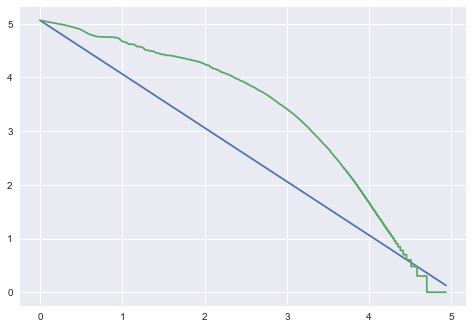

In [108]:
plt.style.use("seaborn")
frequency = dict(sorted(frequency.items(), key=lambda kv: kv[1]))
K = 0
avr = 0
for i, key in enumerate(frequency.keys()):
    avr = avr + frequency[key]
    if (i == len(frequency) -1):
        avr = avr + frequency[key]    
        K = frequency[key]
        break
list_c = []
real = []
nums = []
for i, key in enumerate(frequency.keys()):
        real.append(math.log10(frequency[key] ))
        cf_formula[key] = math.log10(K / (len(frequency) + 1 - (i+1)))
        list_c.append(math.log10(K / (len(frequency) + 1 - (i+1))))
        nums.append( math.log10(len(frequency) + 1 -(i+1)))

plt.plot(nums,cf_list)
plt.plot(nums,cf_accuall)

plt.show()

In [123]:
import random
def random_sample(x,data):
    p=random.sample(range(len(data)), x)
    listofsample=[]
    for i in range(len(p)):
           #print(p[i])
           listofsample.append(data[p[i]])
    return listofsample


list_sample_5=random_sample(5000,data['Tweet_lemmatized'])
print(" first random sample done ")
list_sample_10=random_sample(10000,data['Tweet_lemmatized'])
print(" secound random sample done ")
list_sample_15=random_sample(15000,data['Tweet_lemmatized'])
print(" first random sample done ")
list_sample_25=random_sample(25000,data['Tweet_lemmatized'])
print(" secound random sample done ")
list_sample_30=random_sample(30000,data['Tweet_lemmatized'])
print(" first random sample done ")
list_sample_40=random_sample(40000,data['Tweet_lemmatized'])
print(" secound random sample done ")
dat_forposting_sample5=pd.Series(list_sample_5)
dat_forposting_sample10=pd.Series(list_sample_10)
dat_forposting_sample15=pd.Series(list_sample_15)
dat_forposting_sample25=pd.Series(list_sample_25)
dat_forposting_sample30=pd.Series(list_sample_30)
dat_forposting_sample40=pd.Series(list_sample_40)

 first random sample done 
 secound random sample done 
 first random sample done 
 secound random sample done 
 first random sample done 
 secound random sample done 


In [124]:
#Creating posting list using Dictioanry 
frequency={}

def creatte_postngs_list(data):

    diction={}

    for i in range(len(data)) :
           
        for words in data[i]:
            
            if (words not in frequency):
                frequency[words] = 0
                frequency[words] = frequency[words] + 1
            
            else:
                frequency[words] = frequency[words] + 1  
                
            if words not in diction.keys():
                    diction[words] = set()
                    diction[words].add(i)
            else:
                diction[words].add(i)
    return  diction
            
            
            
diction_sample5=creatte_postngs_list(dat_forposting_sample5)   
diction_sample10=creatte_postngs_list(dat_forposting_sample10) 
diction_sample15=creatte_postngs_list(dat_forposting_sample15)   
diction_sample25=creatte_postngs_list(dat_forposting_sample25) 
diction_sample30=creatte_postngs_list(dat_forposting_sample30)   
diction_sample40=creatte_postngs_list(dat_forposting_sample40) 
diction=creatte_postngs_list(data['Tweet_lemmatized']) 

In [129]:
# law
import seaborn as sns
import matplotlib.pyplot as plt
def frequency(diction):
    listoffrequency=[]
        #print value
    lengths = [len(v) for v in diction.values()]
    return lengths
    
list_all=[]   
list_frequency_first_sample_5=frequency(diction_sample5)    
list_all.append(list_frequency_first_sample_5)
list_frequency_secound_sample_10=frequency(diction_sample10)   
list_all.append(list_frequency_secound_sample_10)
list_frequency_first_sample_15=frequency(diction_sample15) 
list_all.append(list_frequency_first_sample_15)
    
list_frequency_secound_sample_25=frequency(diction_sample25) 
list_all.append(list_frequency_secound_sample_25)
list_frequency_first_sample_30=frequency(diction_sample30)
list_all.append(list_frequency_first_sample_30)
    
list_frequency_secound_sample_40=frequency(diction_sample40)
list_all.append(list_frequency_secound_sample_40)






term_freq_df=frequency(diction)   
term_freq_df1=pd.DataFrame(term_freq_df)
term_freq_df1['total']=term_freq_df

In [136]:
len(token)

6

In [121]:
sum(list_frequency_first_sample)
sum(list_frequency_secound_sample)

1821650

In [117]:
import math as m 
def Heap_law(list_sample_5,list_sample_10):
    print(m.log(list_sample_5/list_sample_10,10))
    print(m.log(1/3,10)/m.log(list_sample_5/list_sample_10,10))

    b=(m.log(1/3,10))/(m.log(list_sample_5/list_sample_10),10)
    print(b)
    
    t =15000/(pow(sumof,b))
    return b,t


b,k=Heap_law(sum(list_frequency_first_sample()),sum(list_frequency_secound_sample))
print(b,k)

    

TypeError: 'list' object is not callable

done


TypeError: can only concatenate str (not "int") to str

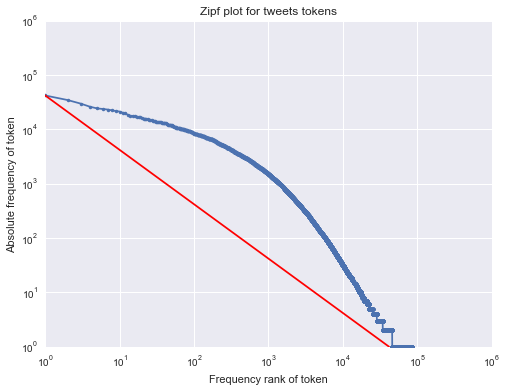

In [105]:
from pylab import *
counts = term_freq_df1.total
tokens = term_freq_df1.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')

title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    print("done")
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [31]:
list(diction.items())[0]


('گزارش', {0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 34, 35, 36, 37, 38, 39, 40, 42, 44, 47, 48, 49, 50, 53, 56, 57, 59, 62, 64, 65, 66, 68, 69, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113, 114, 115, 119, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 136, 141, 142, 144, 145, 146, 148, 149, 151, 152, 154, 155, 158, 161, 162, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 221, 223, 226, 227, 228, 230, 232, 235, 237, 238, 239, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 260, 261, 263, 264, 266, 267, 270, 272, 273, 274, 276, 277, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 291, 292, 293